# Regression - Prediction of Store Sales

## Business Objective : 

Build a model to predict the sales of a store


### Import Libraries

In [2]:
# data read
import pandas as pd
import numpy as np

from numpy import mean
from numpy import std

#Feature scaling
from sklearn.preprocessing import StandardScaler 

#Ignore warrings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt # to visualize 
import seaborn as sns      # to visualize 
from matplotlib import pyplot

#model building
from sklearn.linear_model import LinearRegression

#splitting the data in train and test set
from sklearn.model_selection import train_test_split

#model performance metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Import data

In [3]:
#read the data
store_sales = pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
store_sales_c = store_sales

In [4]:
#preview the data
store_sales_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Data Preparation

In [5]:
#Drop the Item_Identifier, Outlet_Identifier and Outlet_Establishment_Year columns from the dataset
store_sales_c.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year' ], axis=1, inplace=True)

In [6]:
store_sales_c.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.064299,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# Datatypes of all columns
print(store_sales_c.dtypes)

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object


In [8]:
# structure of dataset
print(store_sales_c.shape)

(14204, 9)


In [9]:
# Summary of dataset
store_sales_c.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,2181.288914
std,4.651716,0.048621,62.086938,1706.499616
min,4.555000,0.003575,31.290000,33.290000
25%,8.710000,0.033143,94.012000,834.247400
50%,12.600000,0.062347,142.247000,1794.331000
75%,16.750000,0.094037,185.855600,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


#### Count of each label in categorical column

In [10]:
# Item_Fat
store_sales_c.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [11]:
# Item_Type
store_sales_c.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [12]:
# Outlet_Size 
store_sales_c.Outlet_Size.value_counts()

Small     7071
Medium    5580
High      1553
Name: Outlet_Size, dtype: int64

In [13]:
# Outlet_Location_Type
store_sales_c.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [14]:
#Outlet_Type
store_sales_c.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

### Missing Value Treatment

In [15]:
# Checking for null value in each column
print(store_sales_c.isnull().sum())

Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
dtype: int64


We find that there is missing value exist in this dataset, so we need to do the missing value treatment.

In [16]:

median_value = store_sales_c['Item_Outlet_Sales'].median()

# Replace nulls in column Item_Outlet_Sale with the # median of values in the same column

store_sales_c['Item_Outlet_Sales'].fillna(value = median_value, inplace=True)

In [17]:
# Again Check for null value in each column
print(store_sales_c.isnull().sum())

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64


Now, there is no missing value exist in the dataset

### EDA

###### Analysis of which item type is highest in deman with respect to outlet location

In [18]:
item_df = pd.crosstab(store_sales_c['Item_Type'], store_sales_c['Outlet_Location_Type'])
item_df.head()

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Type,,,
Baking Goods,305,352,429
Breads,117,134,165
Breakfast,54,60,72
Canned,305,356,423
Dairy,318,374,444


<AxesSubplot:xlabel='Item_Type'>

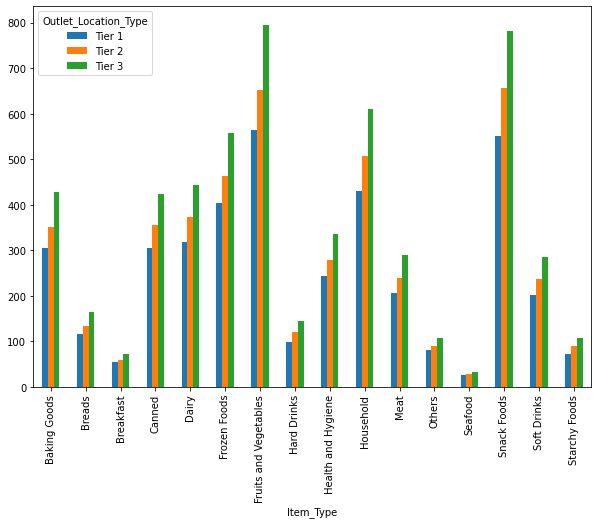

In [20]:
item_df.plot(kind = "bar", figsize=(10,7))


1. From the above graph, we analyize that Fruits & vegetables, snack foods and household has highest sales in Tier 3 location of outlets

2. Frozen food also in demand in Tier 3 location 

#### Analysis of outlet type where the items are sold most

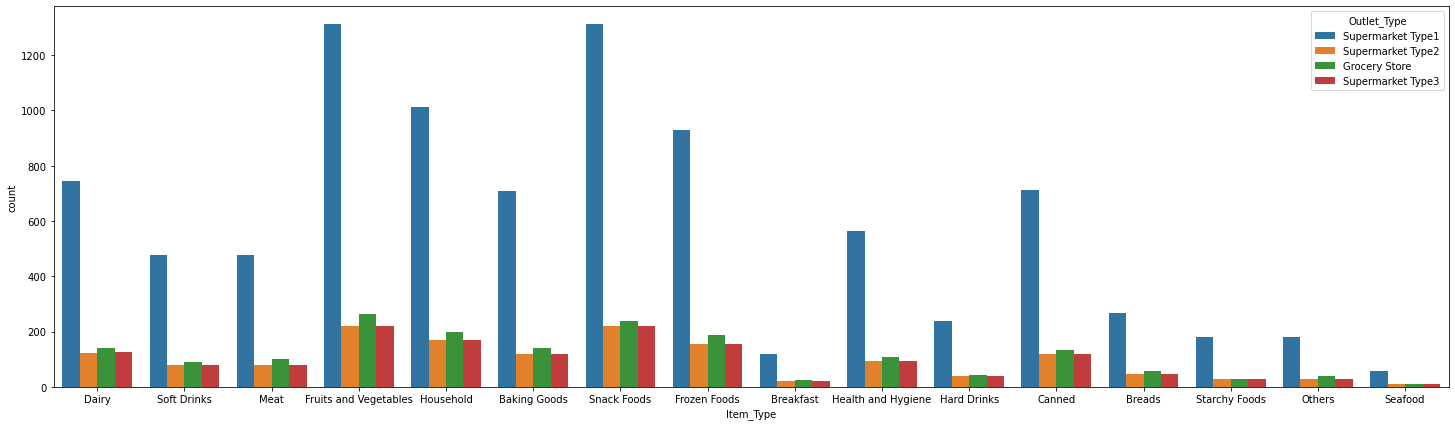

In [21]:
fig, ax = plt.subplots(figsize = (25, 7))
sns.countplot(x = "Item_Type", hue = "Outlet_Type", data = store_sales_c)
plt.show()

From the above graph, we found that mostly item are sold from Supermarket Type 1

#### Analise the Item_Outlet_Sales featue of the dataset

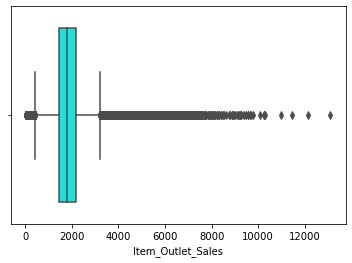

In [23]:
sns.boxplot(x = store_sales_c['Item_Outlet_Sales'], color = "cyan") 
plt.show()

There is outliers are peresent the in Item_Outlet_Sales features. 
And the strength of outliers is increasing at the end of the tail.

#### Fix the outliers by capping

In [24]:
upper_limit = store_sales_c['Item_Outlet_Sales'].mean() + 3*store_sales_c['Item_Outlet_Sales'].std()
lower_limit = store_sales_c['Item_Outlet_Sales'].mean() - 3*store_sales_c['Item_Outlet_Sales'].std()

In [25]:
#apply the capping on outliers
store_sales_c['Item_Outlet_Sales'] = np.where( store_sales_c['Item_Outlet_Sales']>upper_limit, upper_limit,
    np.where(store_sales_c['Item_Outlet_Sales']<lower_limit, lower_limit, store_sales_c['Item_Outlet_Sales']))

In [26]:
store_sales_c['Item_Outlet_Sales'].describe()

count    14204.000000
mean      2004.024852
std       1245.723088
min         33.290000
25%       1468.089000
50%       1794.331000
75%       2163.184200
max       6032.688865
Name: Item_Outlet_Sales, dtype: float64

### Feature Engineering

In [27]:
from sklearn import preprocessing

In [28]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Item_Fat_Content'.
store_sales_c['Item_Fat_Content']= label_encoder.fit_transform(store_sales_c['Item_Fat_Content'])
 
# Encode labels in column 'Item_Type'.
store_sales_c['Item_Type']= label_encoder.fit_transform(store_sales_c['Item_Type'])

 
# Encode labels in column 'Outlet_Size'.
store_sales_c['Outlet_Size']= label_encoder.fit_transform(store_sales_c['Outlet_Size'])

# Encode labels in column 'Outlet_Location_Type'.
store_sales_c['Outlet_Location_Type']= label_encoder.fit_transform(store_sales_c['Outlet_Location_Type'])

# Encode labels in column 'Outlet_Type'.
store_sales_c['Outlet_Type']= label_encoder.fit_transform(store_sales_c['Outlet_Type'])


### Feature Scaling

In [29]:
# scaling the data using StandardScaler Scaling process
final_data = StandardScaler()
store_sales_scaled = final_data.fit_transform(store_sales_c)

### Feature Selection

In [30]:
# Finding correlation among numerical features, based on their strong relation we can choose the important features
corr = store_sales_c.corr()
corr.style.background_gradient(cmap ='coolwarm')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.000944,-0.001719,0.001913,0.012003
Item_Fat_Content,-0.033737,1.000000,0.048315,-0.147733,-0.004019,-0.000827,0.001373,-0.000228,0.015251
Item_Visibility,-0.020472,0.048315,1.000000,-0.037821,-0.009144,0.026808,-0.020550,-0.172744,-0.107109
Item_Type,0.031884,-0.147733,-0.037821,1.000000,0.043948,-0.001080,0.002083,0.004305,0.013410
Item_MRP,0.035751,-0.004019,-0.009144,0.043948,1.000000,-0.001305,0.000838,0.000136,0.443142
Outlet_Size,0.000944,-0.000827,0.026808,-0.001080,-0.001305,1.000000,-0.590677,-0.260496,-0.044666
Outlet_Location_Type,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.590677,1.000000,0.467251,0.062703
Outlet_Type,0.001913,-0.000228,-0.172744,0.004305,0.000136,-0.260496,0.467251,1.000000,0.306268
Item_Outlet_Sales,0.012003,0.015251,-0.107109,0.013410,0.443142,-0.044666,0.062703,0.306268,1.000000


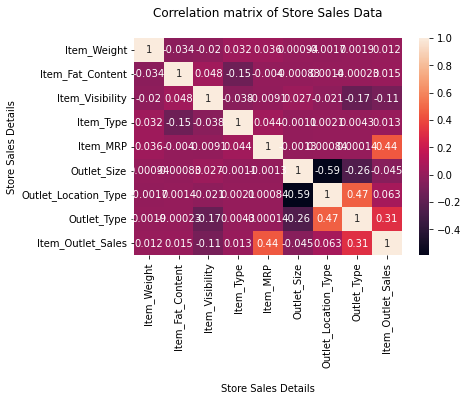

In [31]:
# Correlation Heatmap
hm = sns.heatmap(store_sales_c.corr(), annot = True);

hm.set(xlabel='\nStore Sales Details', ylabel='Store Sales Details', title = "Correlation matrix of Store Sales Data\n")
plt.show()

##### Observation: 

1. Item_Outlet_Sales is strongly correlated with Item_MRP and Outlet_Type.

2. Item_Weight and Item_Fat_Content is not strongly correlated, we can drop these features

In [32]:
#Drop the features
store_sales_c.drop(["Item_Type", "Outlet_Size",'Item_Weight', 'Item_Fat_Content', 'Outlet_Location_Type'], 
                   axis=1, inplace=True)

In [33]:
store_sales_c.head()

,Item_Visibility,Item_MRP,Outlet_Type,Item_Outlet_Sales
0,0.016047,249.8092,1,3735.1380
1,0.019278,48.2692,2,443.4228
2,0.016760,141.6180,1,2097.2700
3,0.074402,182.0950,0,732.3800
4,0.064299,53.8614,1,994.7052


### Splitting Data into Train and Test data set

In [34]:
# Divide the dataset into training and testing sets by using random state 42
X = store_sales_c.drop(["Item_Outlet_Sales"], axis = 1)
y = store_sales_c["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## Model 1: Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
# define the model
LinReg_model = LinearRegression()

LinReg_model.fit(X_train, y_train)

LinearRegression()

In [37]:
#predict the value
pred_test_LR = LinReg_model.predict(X_test)
print('LinearRegression ==> Predicted values of y:\n', pred_test_LR, sep='\n')

LinearRegression ==> Predicted values of y:

[2649.12484336 2438.93546837 2407.35711306 ...  645.61177443 1895.20623792
 2044.11949132]


### Evaluation

In [175]:
# report performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [73]:
#the accuracy of training and testing dataset
train_LR = LinReg_model.score(X_train,y_train)
test_LR = LinReg_model.score(X_test,y_test)
print("R-Squared on train dataset={}".format(train_LR))
print("R-Squared on test dataset={}".format(test_LR))

print("\n-------------------------------------------------------------------------")
#the model performance by MSE, RMSE
MSE_Reg = mean_squared_error(y_test,pred_test_LR)
RMSE_Reg = mean_squared_error(y_test,pred_test_LR, squared=False)

print("\nMSE value for Linear Regression Model :",MSE_Reg, "\nRMSE value for Linear Regression Model:",RMSE_Reg)

R-Squared on train dataset=0.2955559222875509
R-Squared on test dataset=0.2795512734954564

-------------------------------------------------------------------------

MSE value for Linear Regression Model : 1038249.3889188094 
RMSE value for Linear Regression Model: 1018.9452335227882


R-Squared value of training and testing data set is almost same.

### Plot original and predicted sales value

In [58]:
#Prediction on test data: Linear Regression

df_LR_test = pd.DataFrame({"Actual": y_test, "Predicted": pred_test_LR})
df_LR_test.sample(5, random_state=1)

,Actual,Predicted
9598,1794.3310,3002.343149
5664,5086.7120,2995.816433
11586,1794.3310,1696.578245
1807,120.5098,1168.388534
8918,1794.3310,2034.385755


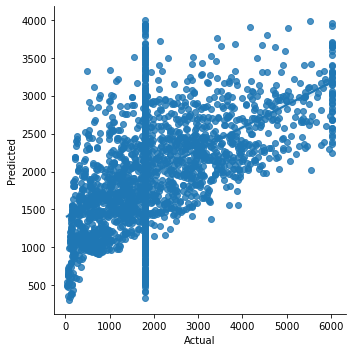

In [66]:
import seaborn as sns
sns.lmplot(data=df_LR_test, x="Actual", y="Predicted")

## Model 2: Bagging with Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
# define the model
RF_model = RandomForestRegressor(n_estimators=10, criterion='squared_error',random_state=1, n_jobs=-1)

RF_model.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [42]:
#predict the values
y_pred_RF = RF_model.predict(X_test)

print('Bagging with Random Forest ==> Predicted values of y:\n', y_pred_RF, sep='\n')

Bagging with Random Forest ==> Predicted values of y:

[2506.20436 2788.43698 2970.06722 ...  636.10532 2425.24308 1665.4987 ]


### Evaluation

In [74]:
#the accuracy of training and testing dataset

train_RF = RF_model.score(X_train,y_train)
test_RF = RF_model.score(X_test,y_test)

print("R-Squared on train dataset={}".format(train_RF))
print("R-Squared on test dataset={}".format(test_RF))

print("\n-------------------------------------------------------------------------")

#MSE and RMSE value
MSE_RF = mean_squared_error(y_test,y_pred_RF)
RMSE_RF = mean_squared_error(y_test,y_pred_RF, squared=False)

print('\nMean Squared Error:', MSE_RF) 
print('Root Mean Squared Error:', RMSE_RF) 

R-Squared on train dataset=0.8589400692259805
R-Squared on test dataset=0.161078604038718

-------------------------------------------------------------------------

Mean Squared Error: 1208982.1172058417
Root Mean Squared Error: 1099.5372286584213


For bagging with random forest, R-Squared value of training and testing data set is not same

### Plot original and predicted sales value¶

In [67]:
#Prediction on test data: Linear Regression

df_RF_test = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_RF})
df_RF_test.sample(5, random_state=1)

,Actual,Predicted
9598,1794.3310,3617.75746
5664,5086.7120,3034.64982
11586,1794.3310,1719.89456
1807,120.5098,837.64298
8918,1794.3310,2420.58248


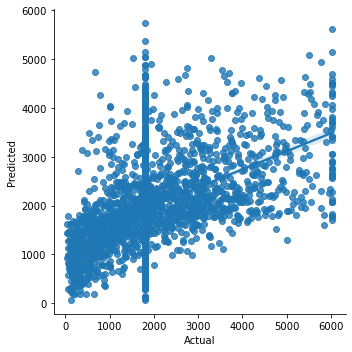

In [68]:
sns.lmplot(data=df_RF_test, x="Actual", y="Predicted")

## Model 3: Boosting using Adaboost

In [45]:
from sklearn.ensemble import AdaBoostRegressor

In [46]:
# define the model
Ada_model = AdaBoostRegressor(random_state=0, n_estimators=100)

Ada_model.fit(X_train, y_train) 

AdaBoostRegressor(n_estimators=100, random_state=0)

In [47]:
#predict the values

y_pred_ada = Ada_model.predict(X_test)
print('Stacking ==> Predicted values of y:\n', y_pred_ada, sep='\n')

Stacking ==> Predicted values of y:

[3109.8935622  3108.0068895  3108.0068895  ...  764.4837507  1911.31071329
 1676.23846545]


### Evaluation

In [75]:

#the accuracy of training and testing dataset
train_ada = Ada_model.score(X_train,y_train)
test_ada = Ada_model.score(X_test,y_test)
print("R-Squared on train dataset={}".format(train_ada))
print("R-Squared on test dataset={}".format(test_ada))

print("\n-------------------------------------------------------------------------")

#MSE and RMSE value
MSE_ada = mean_squared_error(y_test,y_pred_ada)
RMSE_ada = mean_squared_error(y_test,y_pred_ada, squared=False)

print('\nMean Squared Error:', MSE_ada) 
print('Root Mean Squared Error:', RMSE_ada) 

R-Squared on train dataset=0.30192548319489054
R-Squared on test dataset=0.27072315812239434

-------------------------------------------------------------------------

Mean Squared Error: 1050971.71745405
Root Mean Squared Error: 1025.169116513978


### Plot original and predicted sales value¶

In [69]:
#Prediction on test data: Linear Regression

df_ada_test = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_ada})
df_ada_test.sample(5, random_state=1)

,Actual,Predicted
9598,1794.3310,3299.463905
5664,5086.7120,3287.901484
11586,1794.3310,1746.047098
1807,120.5098,961.602405
8918,1794.3310,2494.184828


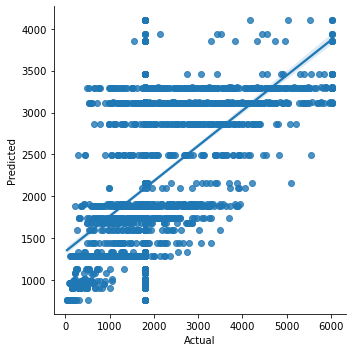

In [70]:
sns.lmplot(data=df_ada_test, x="Actual", y="Predicted")

## Model 4: Stacking

In [49]:
# required Python libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [50]:
def get_stacking():

# define the base models

    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))

# define meta learner model

    level1 = LinearRegression()

# define the stacking ensemble
    stck_model = StackingRegressor(estimators=level0, final_estimator=level1)
    return stck_model

In [52]:
# define the model
model_stack = get_stacking()

model_stack.fit(X_train, y_train)

StackingRegressor(estimators=[('knn', KNeighborsRegressor()),
                              ('cart', DecisionTreeRegressor()),
                              ('svm', SVR())],
                  final_estimator=LinearRegression())

In [53]:
#predict the values
y_pred_stck = model_stack.predict(X_test)

print('Stacking ==> Predicted values of y:\n', y_pred_stck, sep='\n')

Stacking ==> Predicted values of y:

[2471.50432046 2506.44347753 2660.7495396  ...  511.87382937 1946.36934413
 1626.49607199]


### Evaluation

In [77]:
#the accuracy of training and testing dataset

train_stck = model_stack.score(X_train,y_train)
test_stck = model_stack.score(X_test,y_test)

print("R-Squared on train dataset={}".format(train_stck))
print("R-Squared on test dataset={}".format(test_stck))

print("\n-------------------------------------------------------------------------")

#MSE and RMSE value
MSE_stck = mean_squared_error(y_test,y_pred_stck)
RMSE_stck = mean_squared_error(y_test,y_pred_stck, squared=False)

print('\nMean Squared Error:', MSE_stck) 
print('Root Mean Squared Error:', RMSE_stck) 

R-Squared on train dataset=0.5143346824823514
R-Squared on test dataset=0.26714517550763706

-------------------------------------------------------------------------

Mean Squared Error: 1056128.0014846392
Root Mean Squared Error: 1027.6808850439124


### Plot original and predicted sales value¶

In [71]:
#Prediction on test data: Linear Regression

df_stck_test = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_stck})
df_stck_test.sample(5, random_state=1)

,Actual,Predicted
9598,1794.3310,3233.715264
5664,5086.7120,3586.672900
11586,1794.3310,1749.919280
1807,120.5098,1365.682262
8918,1794.3310,2219.726479


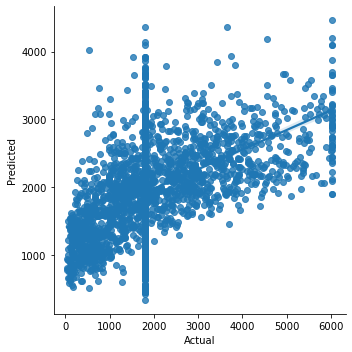

In [72]:
sns.lmplot(data=df_stck_test, x="Actual", y="Predicted")

## Evaluate the best model

In [87]:
print("Linear Regression Model: R2 value on train data =>",'%.2f' % train_LR, "\n")

print("Bagging with Random Forest: R2 value on train data =>",'%.2f' % train_RF,"\n")

print("Boosting using Adaboost: R2 value on train data =>",'%.2f' % train_ada,"\n")

print("Stacking: R2 value on train data =>",'%.2f' % train_stck,"\n")

Linear Regression Model: R2 value on train data => 0.30 

Bagging with Random Forest: R2 value on train data => 0.86 

Boosting using Adaboost: R2 value on train data => 0.30 

Stacking: R2 value on train data => 0.51 



In [88]:
print("Linear Regression Model: MSE value =>",'%.2f' % MSE_Reg, "\n")

print("Bagging with Random Forest: MSE value =>",'%.2f' % MSE_RF,"\n")

print("Boosting using Adaboost: MSE value =>",'%.2f' % MSE_ada,"\n")

print("Stacking: MSE value =>",'%.2f' % MSE_stck,"\n")

Linear Regression Model: MSE value => 1038249.39 

Bagging with Random Forest: MSE value => 1208982.12 

Boosting using Adaboost: MSE value => 1050971.72 

Stacking: MSE value => 1056128.00 



In [89]:
print("Linear Regression Model: RMSE Value =>",'%.2f' % RMSE_Reg, "\n")

print("Bagging with Random Forest: RMSE Value =>",'%.2f' % RMSE_RF,"\n")

print("Boosting using Adaboost: RMSE Value =>",'%.2f' % RMSE_ada,"\n")

print("Stacking: RMSE Value =>",'%.2f' % RMSE_stck,"\n")

Linear Regression Model: RMSE Value => 1018.95 

Bagging with Random Forest: RMSE Value => 1099.54 

Boosting using Adaboost: RMSE Value => 1025.17 

Stacking: RMSE Value => 1027.68 



##### Interpretation

Bagging with Random Forest is the best model. The R2 score value of the model is highest value as compare to orther models